<a href="https://colab.research.google.com/github/mfiddin/Pemrograman_Python/blob/main/Tugas13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NAMA  : MUHAMMAD FAQIHNA FIDDIN
# NIM   : 1101208513
# KELAS : TTX-44-01

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
f1=1800 #MHz
f2=900 #MHz
f3=700 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [ ]:
LpUrban=cos(f1,loc1,tower,user,d)
LpUrban2=cos(f2,loc1,tower,user,d)
LpUrban3=cos(f3,loc1,tower,user,d)
LpOpen=cos(f1,loc2,tower,user,d)
LpSubUrban=cos(f1,loc3,tower,user,d)

In [ ]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]
SubUrban_sort=LpSubUrban[np.argsort(d)]

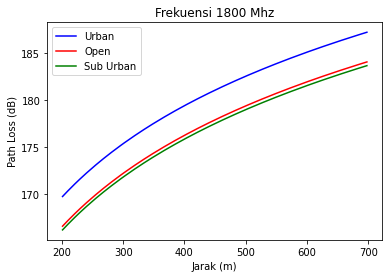

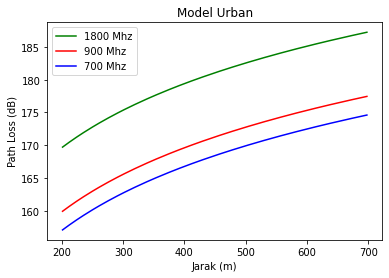

In [ ]:
pict1 = plt.figure()
plt.plot(d_sort,Urban_sort,'b', label='Urban')
plt.plot(d_sort,Open_sort,'r', label='Open')
plt.plot(d_sort,SubUrban_sort,'g', label='Sub Urban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Frekuensi 1800 Mhz')
pict1.show()

pict2 = plt.figure()
plt.plot(d_sort,Urban_sort,'g', label='1800 Mhz')
plt.plot(d_sort,Urban2_sort,'r', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'b', label='700 Mhz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Model Urban')
pict2.show()